In [1]:
import pandas as pd
import numpy as np


## Variable 1

In [3]:
cc = pd.read_csv('../data/creditcard.csv')
cc.tail()
cc['Timehours'] = np.floor(cc['Time'] / (60*60))

In [3]:
data_var_1 = pd.read_csv('../data/df_indegrees_hnsw.csv')
data_var_1 = data_var_1.drop(['Unnamed: 0'], axis=1)
data_var_1['totalpersteps'] = data_var_1['47'] / (48 - cc['Timehours'])

In [4]:
data_var_1_cc = cc.copy()
data_var_1_cc['totalperstep'] = data_var_1['totalpersteps']
data_var_1_cc = data_var_1_cc.drop(['Timehours'], axis=1)
data_var_1_cc.to_csv('../data/final_data/creditcard_v1.csv', index=False)

## Variable 2

In [8]:
df_indegrees = pd.read_csv('../data/df_indegrees_hnsw.csv')
df_indegrees = df_indegrees.drop(['Unnamed: 0'], axis=1)

listy = []
for t in range(0, 48):
    if t == 0:
        temp = df_indegrees[str(t)].iloc[ 0    :   (df_indegrees['0'].notna()[::-1].idxmax()+1)]

    if t > 0:
        temp  = df_indegrees[str(t)].iloc[ (df_indegrees[str(t-1)].notna()[::-1].idxmax()+1)    :   (df_indegrees[str(t)].notna()[::-1].idxmax()+1)]

    temp = temp.rank(pct=True)

    listy.append(temp)

df_indegrees_pct_birth = pd.concat(listy)

In [9]:
data_var_2_cc = cc.copy()
data_var_2_cc['indegree_pct_birth'] = df_indegrees_pct_birth
data_var_2_cc = data_var_2_cc.drop(['Timehours'], axis=1)
data_var_2_cc.to_csv('../data/final_data/creditcard_v2.csv', index=False)

## Variable 3

In [10]:
df_indegrees = pd.read_csv('../data/df_indegrees_hnsw.csv')
df_indegrees = df_indegrees.drop(['Unnamed: 0'], axis=1)

listy = []
for t in range(0, 48):
    if t == 0:
        temp = df_indegrees[str(47)].iloc[ 0    :   (df_indegrees['0'].notna()[::-1].idxmax()+1)]

    if t > 0:
        temp  = df_indegrees[str(47)].iloc[ (df_indegrees[str(t-1)].notna()[::-1].idxmax()+1)    :   (df_indegrees[str(t)].notna()[::-1].idxmax()+1)]

    temp = temp.rank(pct=True)

    listy.append(temp)

df_indegrees_pct_final = pd.concat(listy)

In [15]:
data_var_3_cc = cc.copy()
data_var_3_cc['indegree_pct_final'] = df_indegrees_pct_final
data_var_3_cc = data_var_3_cc.drop(['Timehours'], axis=1)
data_var_3_cc.to_csv('../data/final_data/creditcard_v3.csv', index=False)

## Variable 4

In [12]:
df_pagerank_norm = pd.read_csv('../data/df_pagerank_i10000a09_hnsw.csv')
final_score_pagerank = df_pagerank_norm['47']

In [16]:
data_var_4_cc = cc.copy()
data_var_4_cc['final_pagerank_score'] = final_score_pagerank
data_var_4_cc = data_var_4_cc.drop(['Timehours'], axis=1)
data_var_4_cc.to_csv('../data/final_data/creditcard_v4.csv', index=False)

## Variable 5


In [4]:
df_pagerank_pers_t1 = pd.read_csv('../data/df_pagerank_pers_i10000a09t-1_hnsw.csv')
df_pagerank_pers_t1 = df_pagerank_pers_t1.drop(['Unnamed: 0'], axis=1)

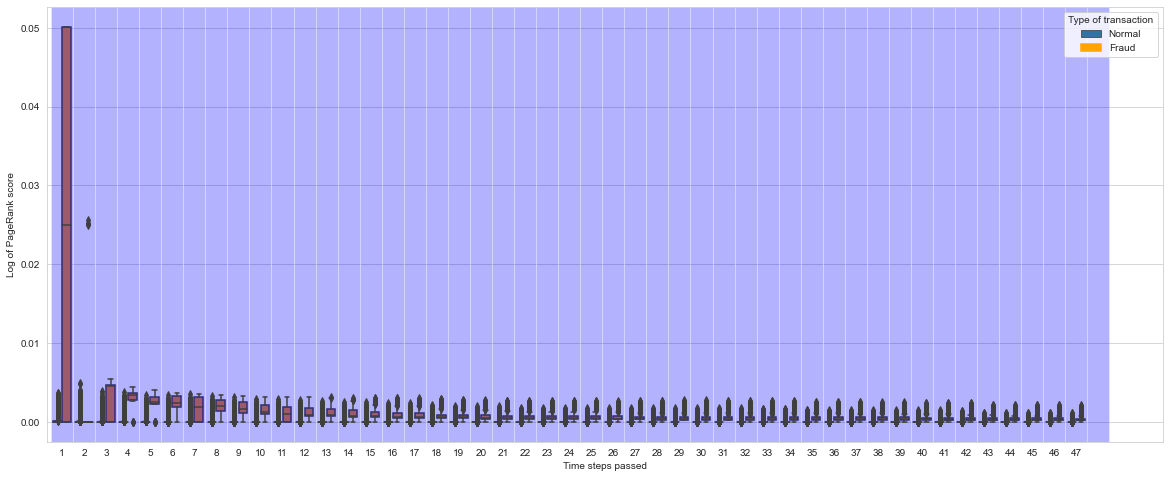

In [8]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
df_pagerank = df_pagerank_pers_t1
df_pagerank['class'] = cc.Class
df_pagerank_long = pd.melt(df_pagerank, "class")
#df_pagerank_long['value'] = np.log(df_pagerank_long.value)

tests_pagerank =[]

df_pagerank_fraud = df_pagerank[df_pagerank['class'] == 1]
df_pagerank_norm = df_pagerank[df_pagerank['class'] == 0]
for t in range(0,48):
    tests_pagerank.append(ttest_ind(df_pagerank_fraud.iloc[:,t], df_pagerank_norm.iloc[:,t], nan_policy='omit'))



rcParams['figure.figsize'] = 20,8
fig, ax = plt.subplots()
ax = sns.boxplot(x="variable", hue="class", y="value", data=df_pagerank_long)

figure = ax.get_figure()
plt.legend(labels=["Normal","Fraud"], title="Type of transaction", fancybox=True)
ax.set(xlabel='Time steps passed', ylabel='Log of PageRank score')

leg = ax.get_legend()
leg.legendHandles[1].set_color('orange')


for t in range(0,48):
    if tests_pagerank[t][1] < 0.05:
        plt.axvspan(t-0.5, t+0.5, facecolor='b', alpha=0.3)

#plt.savefig('../figs/boxplot_PageRank_total.jpg',bbox_inches='tight')

In [11]:
df_pagerank[df_pagerank['class']==1]

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,class
541,0.050005,2.566065e-02,0.005406,0.004500,0.004097,0.003627,0.003510,0.002947,0.002816,0.002642,...,0.001882,0.001882,0.001884,0.001886,0.001647,0.001637,0.001639,1.635067e-03,1.633471e-03,1
623,0.050138,2.506912e-02,0.004013,0.002641,0.002281,0.001825,0.001730,0.001239,0.001167,0.000994,...,0.000261,0.000254,0.000249,0.000240,0.000232,0.000227,0.000222,2.211375e-04,2.185613e-04,1
4920,0.000000,2.519403e-02,0.005420,0.004391,0.003990,0.003563,0.003452,0.002928,0.002786,0.002624,...,0.001645,0.001632,0.001624,0.001604,0.001349,0.001328,0.001317,1.313744e-03,1.306070e-03,1
6108,0.000000,2.500000e-02,0.004897,0.003600,0.003197,0.003451,0.003353,0.003383,0.003192,0.003008,...,0.001814,0.001773,0.001749,0.001700,0.001445,0.001414,0.001391,1.386759e-03,1.370589e-03,1
6329,NaN,1.145800e-23,0.004812,0.003945,0.003437,0.002967,0.002857,0.002273,0.002183,0.001914,...,0.000714,0.000696,0.000688,0.000672,0.000569,0.000564,0.000557,5.547335e-04,5.479349e-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.624090e-12,2.087960e-04,1
280143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.409626e-12,1
280149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.925426e-12,1
281144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.904143e-12,1


In [51]:
listy = []
for t in range(0, 48):
    if t == 0:
        temp = df_pagerank_pers_t1[str(1)].iloc[ 0    :   (df_indegrees['0'].notna()[::-1].idxmax()+1)]

    if t > 0:
        temp  = df_pagerank_pers_t1[str(t)].iloc[ (df_indegrees[str(t-1)].notna()[::-1].idxmax()+1)    :   (df_indegrees[str(t)].notna()[::-1].idxmax()+1)]

    temp = temp.rank(pct=True)

    listy.append(temp)

df_pagerank_pers_batch = pd.concat(listy)

In [59]:
df_pagerank_pers_batch

0         0.964421
1         0.911178
2         0.121120
3         0.314661
4         0.592480
            ...   
284802    0.996705
284803    0.420511
284804    0.391886
284805    0.563015
284806    0.448723
Length: 284807, dtype: float64

In [41]:
data_var_5_cc = cc.copy()
data_var_5_cc['page_pers_batch'] = df_pagerank_pers_batch
data_var_5_cc = data_var_5_cc.drop(['Timehours'], axis=1)
data_var_5_cc.to_csv('../data/final_data/creditcard_v5.csv', index=False)

## Variable 6

In [53]:
df_pagerank_t1 = pd.read_csv('../data/df_pagerank_i10000a09t-1_hnsw.csv')
df_pagerank_t1 = df_pagerank_t1.drop(['Unnamed: 0'], axis=1)

In [60]:
listy = []
for t in range(0, 48):
    if t == 0:
        temp = df_pagerank_t1[str(1)].iloc[ 0    :   (df_indegrees['0'].notna()[::-1].idxmax()+1)]

    if t > 0:
        temp  = df_pagerank_t1[str(t)].iloc[ (df_indegrees[str(t-1)].notna()[::-1].idxmax()+1)    :   (df_indegrees[str(t)].notna()[::-1].idxmax()+1)]

    temp = temp.rank(pct=True)

    listy.append(temp)

df_pagerank_batch = pd.concat(listy)

In [65]:
data_var_6_cc = cc.copy()
data_var_6_cc['page_pers_batch'] = df_pagerank_batch
data_var_6_cc = data_var_6_cc.drop(['Timehours'], axis=1)
data_var_6_cc.to_csv('../data/final_data/creditcard_v6.csv', index=False)